In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\OM\3D Objects\Online PBI Project\Python project\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding ='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [ ]:
df.head(10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
# drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis= 1, inplace =True)  

In [17]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df['Amount']=df['Amount'].astype(int)

In [20]:
df['Amount'].dtype

dtype('int32')

# Exploratory Data Analysis

# Gender

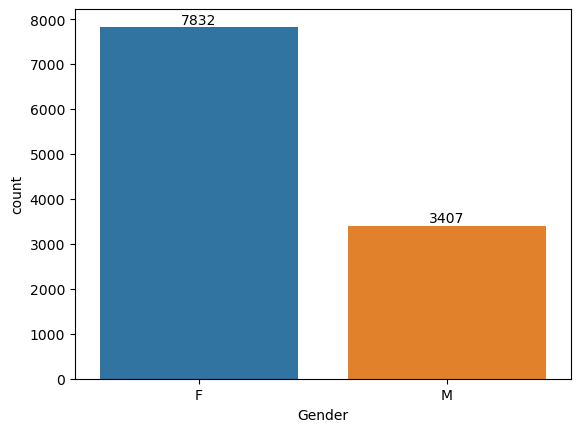

In [21]:
# Plotting a bar chart for Gender and its count 

a =sns.countplot(x = 'Gender',data = df)

for bars in a.containers:
    a.bar_label(bars)

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Amount'>

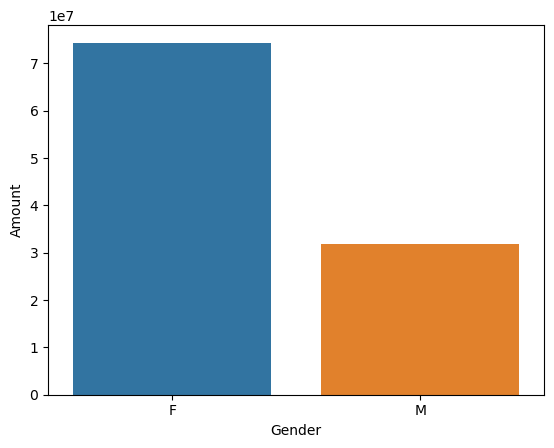

In [26]:
sales_Gen = df.groupby(['Gender'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending = False)

sns.barplot(x='Gender' , y='Amount' , data = sales_Gen) 

From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men.

# Age

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

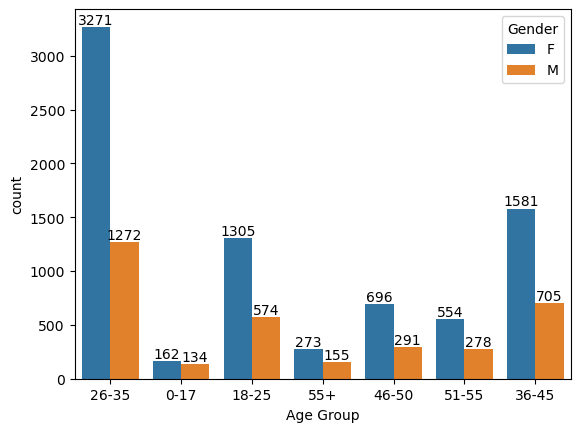

In [10]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

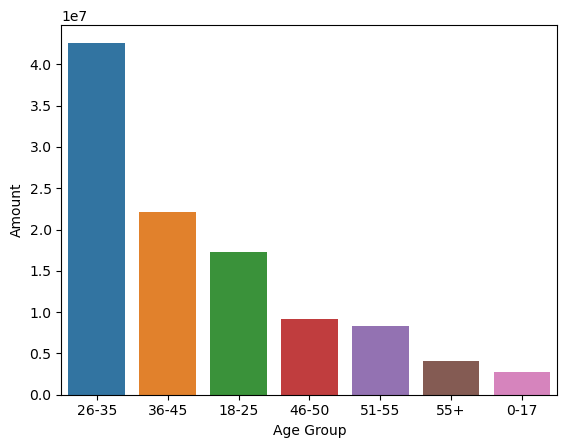

In [11]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending = False)

sns.barplot(x='Age Group' , y='Amount' , data = sales_age)  

From above graphs we can see that most of the buyers are of age group between 26-35 years female 

# Sales

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

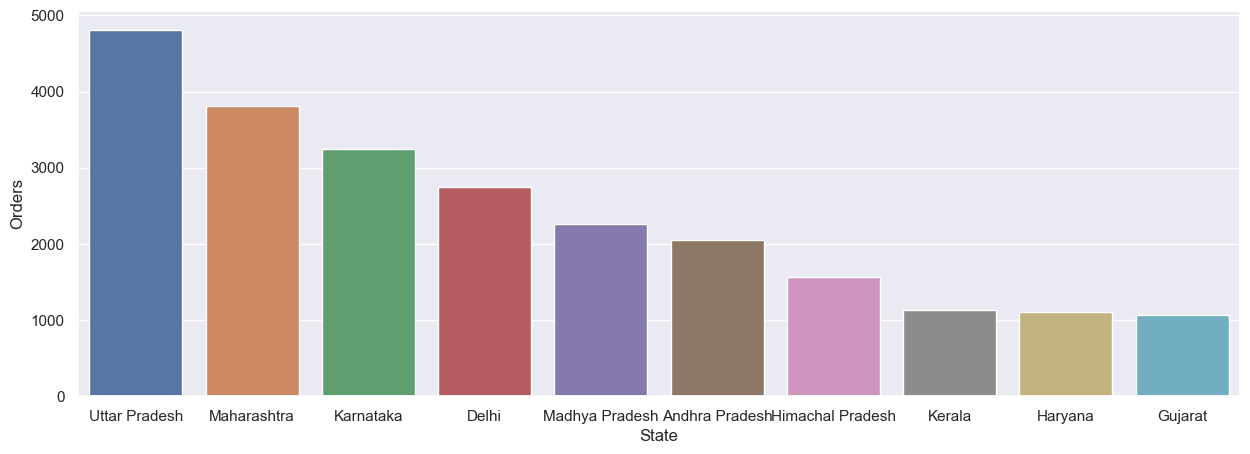

In [20]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index=False) ['Orders'].sum().sort_values(by= 'Orders', ascending = False).head(10)

sns.set(rc= {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x ='State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

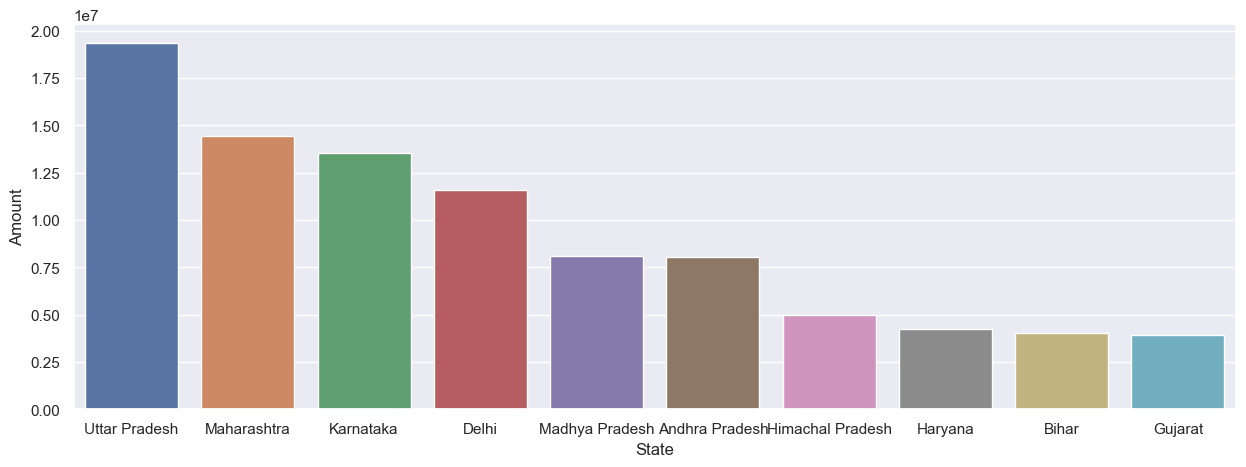

In [22]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc= {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x ='State', y = 'Amount')

From above graphs we can see that most of the orders and total sales/amount are from Utar Pradesh,Maharashtra and Karnataka respectively

# Marital Status

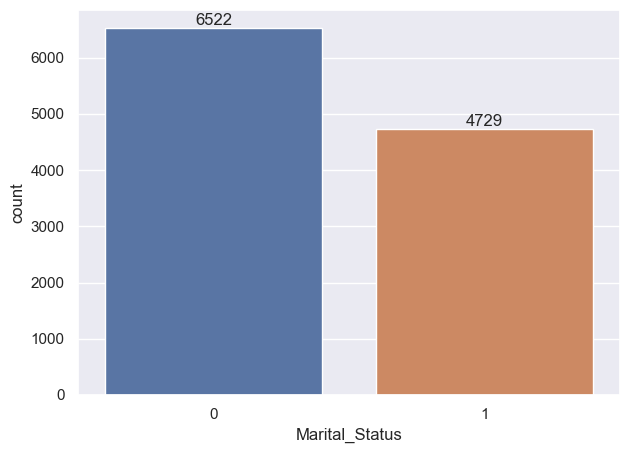

In [24]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

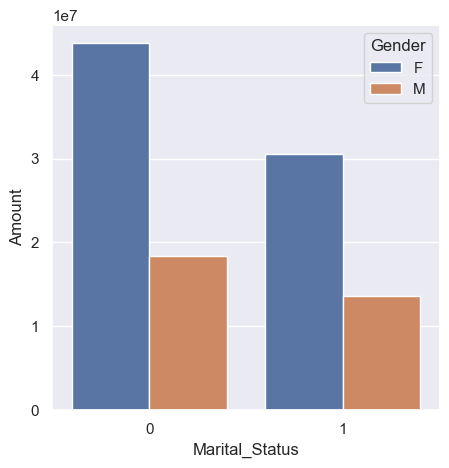

In [25]:
sales_state = df.groupby(['Marital_Status', 'Gender'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc= {'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x ='Marital_Status', y = 'Amount', hue = 'Gender')

# Occupation 

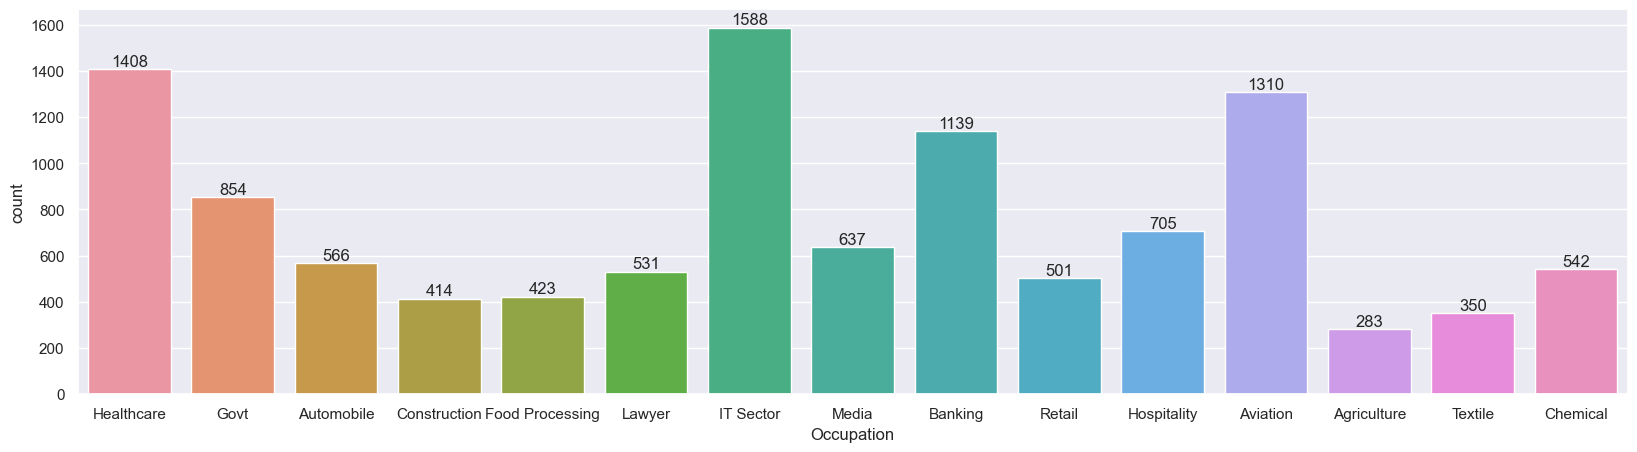

In [27]:
sns.set(rc={'figure.figsize':(20,5)})

ax =sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

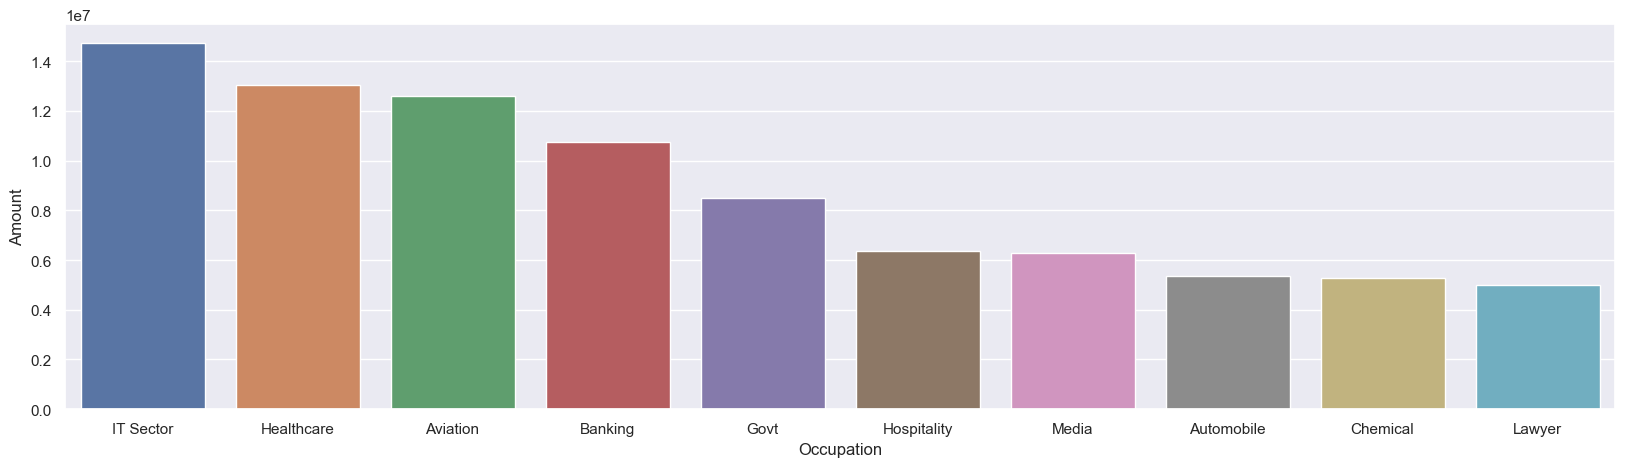

In [29]:
sales_state = df.groupby(['Occupation'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc= {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x ='Occupation', y = 'Amount')

From above graphs we can see that most of the buyers are working in IT Sector, Healthcare and Aviation sector.

# Product Category

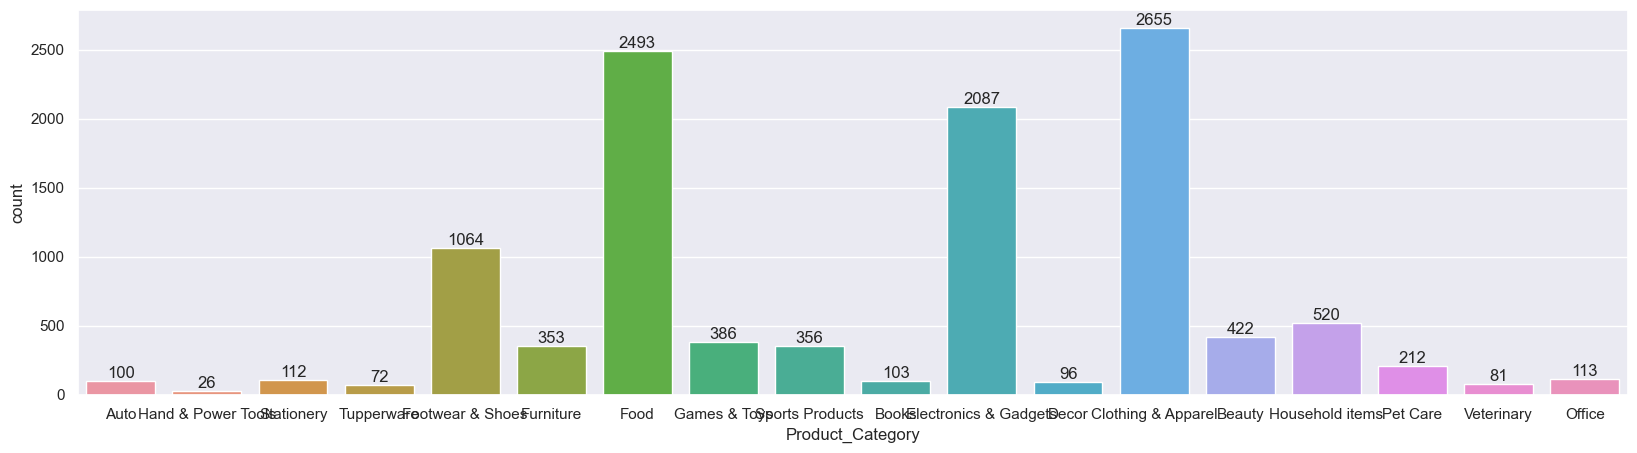

In [30]:
sns.set(rc={'figure.figsize':(20,5)})

ax =sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

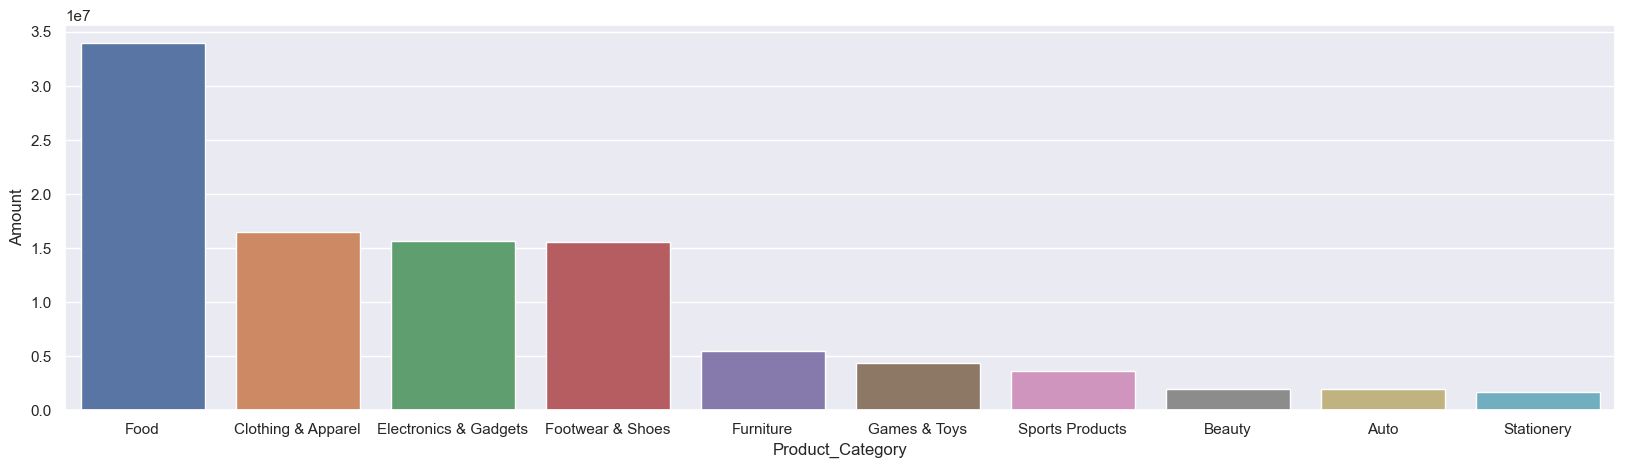

In [31]:
sales_state = df.groupby(['Product_Category'],as_index=False) ['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc= {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x ='Product_Category', y = 'Amount')

From above graphs we can see that most of the sold products are from food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

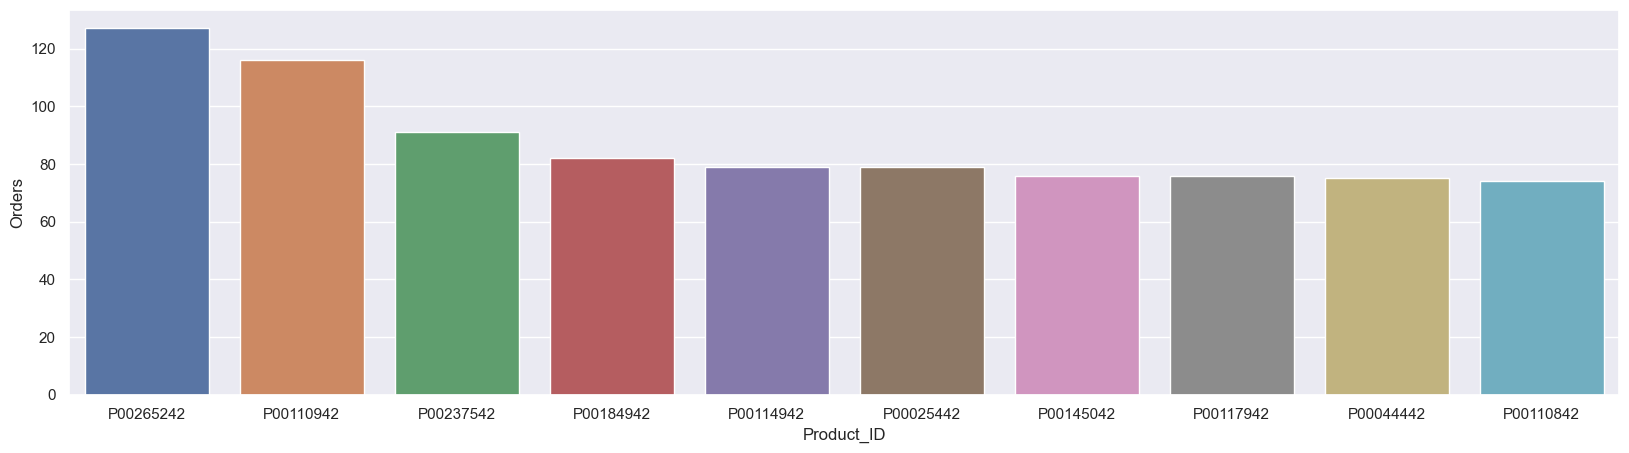

In [32]:
sales_state = df.groupby(['Product_ID'],as_index=False) ['Orders'].sum().sort_values(by= 'Orders', ascending= False).head(10)

sns.set(rc= {'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x ='Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

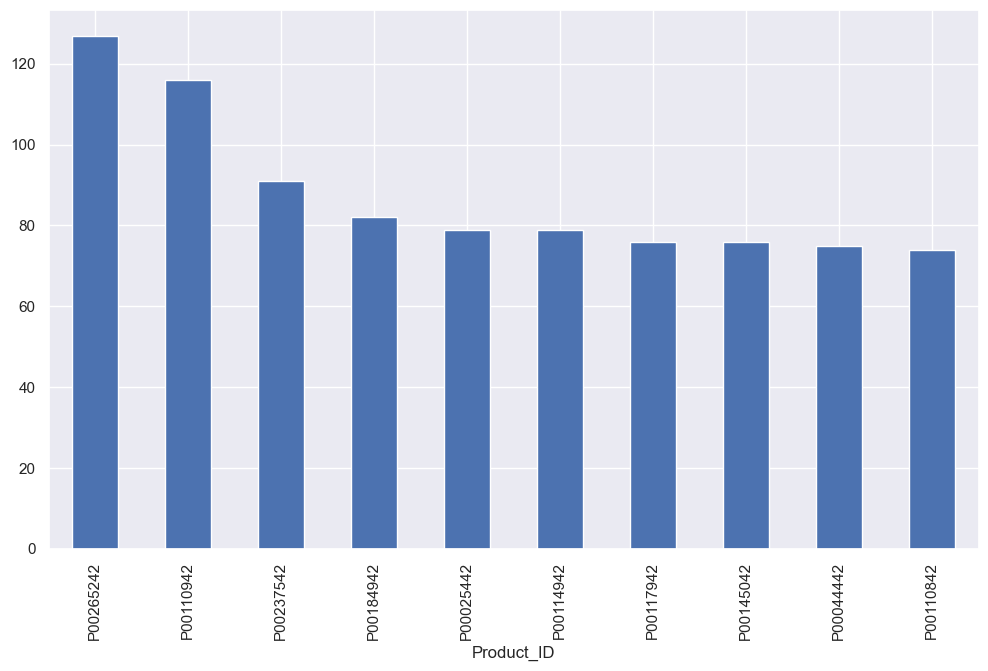

In [34]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')

# Conclusion

Married women age group 26-35 years from Utar Pradesh, Maharashtra, Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronic category.